## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the data 
mat = pd.read_csv('../data/student/student-mat.csv', sep=';')
por = pd.read_csv('../data/student/student-por.csv', sep=';')

# Concatenate into a single dataset
df = pd.concat([mat, por], ignore_index=True)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Inspect and Clean Data

In [2]:
df.info()
df.isnull().sum()

df = df.drop(['G1', 'G2'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

## Create Binary Target Column

Create a binary variable pass_fail: 1 = Pass (G3 > 15), 0 = Fail (G3 ≤ 15).

In [3]:
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x > 15 else 0)
df[['G3','pass_fail']].head()

,G3,pass_fail
0,6,0
1,6,0
2,10,0
3,15,0
4,10,0


## Encode Categorical Variables

In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


## Split Data into Train and Test

- Split 80 % train / 20 % test.
- Separate predictors (X) and target (y).

In [5]:
X = df_encoded.drop(['G3','pass_fail'], axis=1)
y = df_encoded['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Training

- Use Logistic Regression for binary classification.
- Parameters: max_iter=1000 ensures convergence

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow 

## Evaluate Model Performance

Evaluate accuracy, precision, recall, confusion matrix, and ROC-AUC.

Accuracy: 0.8851674641148325

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       186
           1       0.00      0.00      0.00        23

    accuracy                           0.89       209
   macro avg       0.44      0.50      0.47       209
weighted avg       0.79      0.89      0.84       209


Confusion Matrix:
 [[185   1]
 [ 23   0]]

ROC-AUC Score: 0.7262739597942964


/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


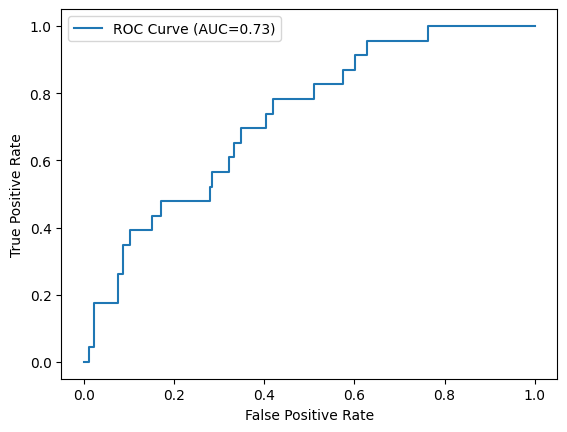

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("\nROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Feature Coefficients

Examine feature coefficients to identify which variables most influence the probability of passing.

In [8]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coeff_df.head(10)

,Feature,Coefficient
36,higher_yes,1.200682
25,Fjob_teacher,1.097097
1,Medu,0.464744
22,Fjob_health,0.373450
20,Mjob_services,0.333262
4,studytime,0.312596
26,reason_home,0.262163
28,reason_reputation,0.258559
18,Mjob_health,0.238898
0,age,0.200109


## Extract Key Variables 

Variables needed for analysis: absences, Medu, and Fedu.

In [9]:
coeff_df.loc[coeff_df['Feature'].isin(['absences', 'Medu', 'Fedu'])]

,Feature,Coefficient
1,Medu,0.464744
12,absences,-0.065209
2,Fedu,-0.172210
